# Data Overview
Import the libraries - Load the data - Check the structure of the data - Check the types of the data - Check for and treat (if needed) missing values - Check the statistical summary - Check for and treat (if needed) data irregularities - Observations and Insights

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
data= pd.read_csv('austo_automobile1.csv')

In [17]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [18]:
data.shape

(1581, 14)

### Observations:
* We have 1581 rows and 14 columns

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


### Observations:
* We have 8 categorical columns and 6 numerical columns
* We have 3 types of datatypes in this dataset , object is for categorical variables and int64 for integer values and float64 for decimal values.

In [20]:
data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

### Observations:
* We have 53 missing values in Gender column and 106 blank cells in Partner_salary Column
* we have no duplicated values in the dataset

In [21]:
data.duplicated().sum()

0

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


### Observations:
*It is observed that mimimum Total_salary is $30000.0 and maximum Total_salary $171000 which is 4.71 times the minimum  Total_salary
*Most of the buyers are from the Age group of 29 to 38
*Average price of the car is $35597.72 and maximum price of the car is $70000 which is almost twice the average price of the car 
*Observed minimum No_of_Dependents is 0 and maximum No_of_Dependents is 4

In [23]:
data['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [24]:
data['Gender'] = data['Gender'].replace('Femal','Female')
data['Gender'] = data['Gender'].replace('Femle','Female')

In [26]:
data['Gender'].value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

### Observations:
*We have replaced the wrong spellings of Female

In [27]:
mode_value = data['Gender'].mode()[0]
mode_value

'Male'

### Obseravtions:
*Observed Gender columns is categorical, so imputing missing values with mode value

In [28]:
data['Gender'] = data['Gender'].fillna(mode_value)

In [29]:
data.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

### Observations:
*Treated missing values in Gender column

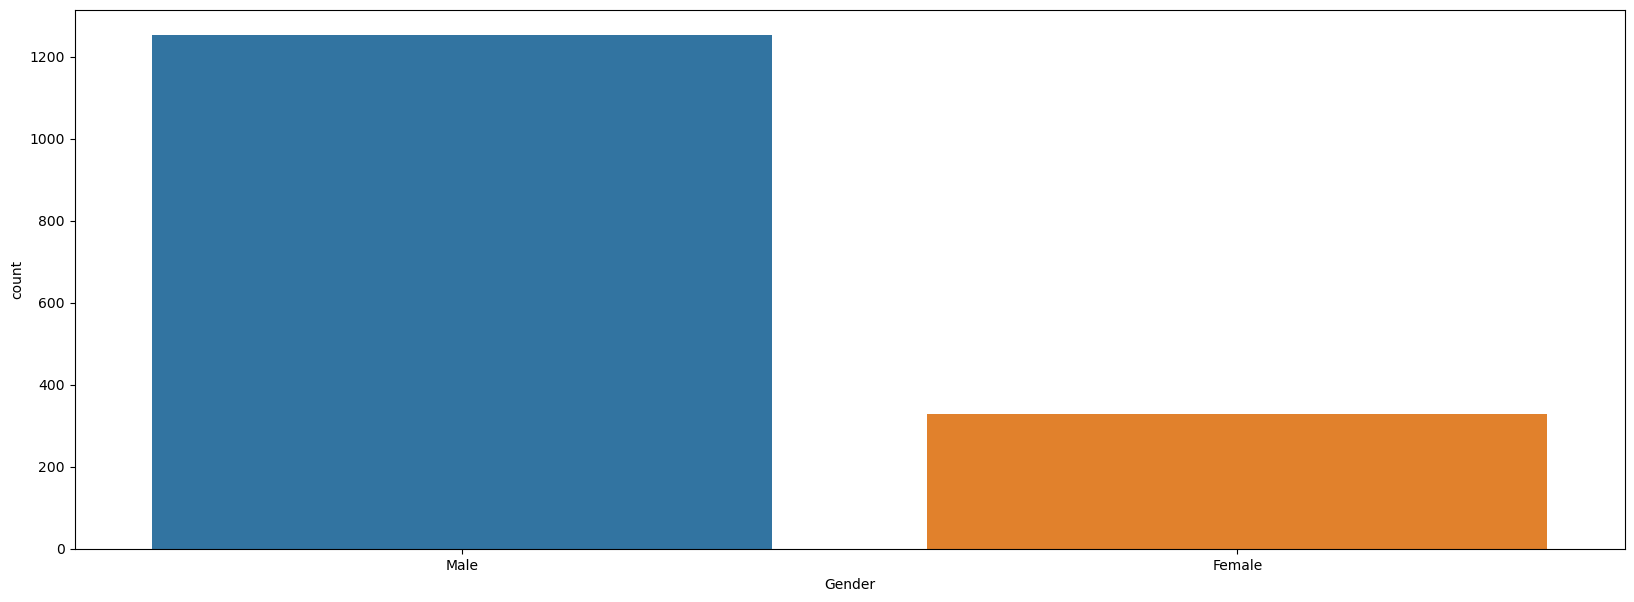

In [138]:
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='Gender');

### Observations:
*Partner_salary distribution before imputing the missing values

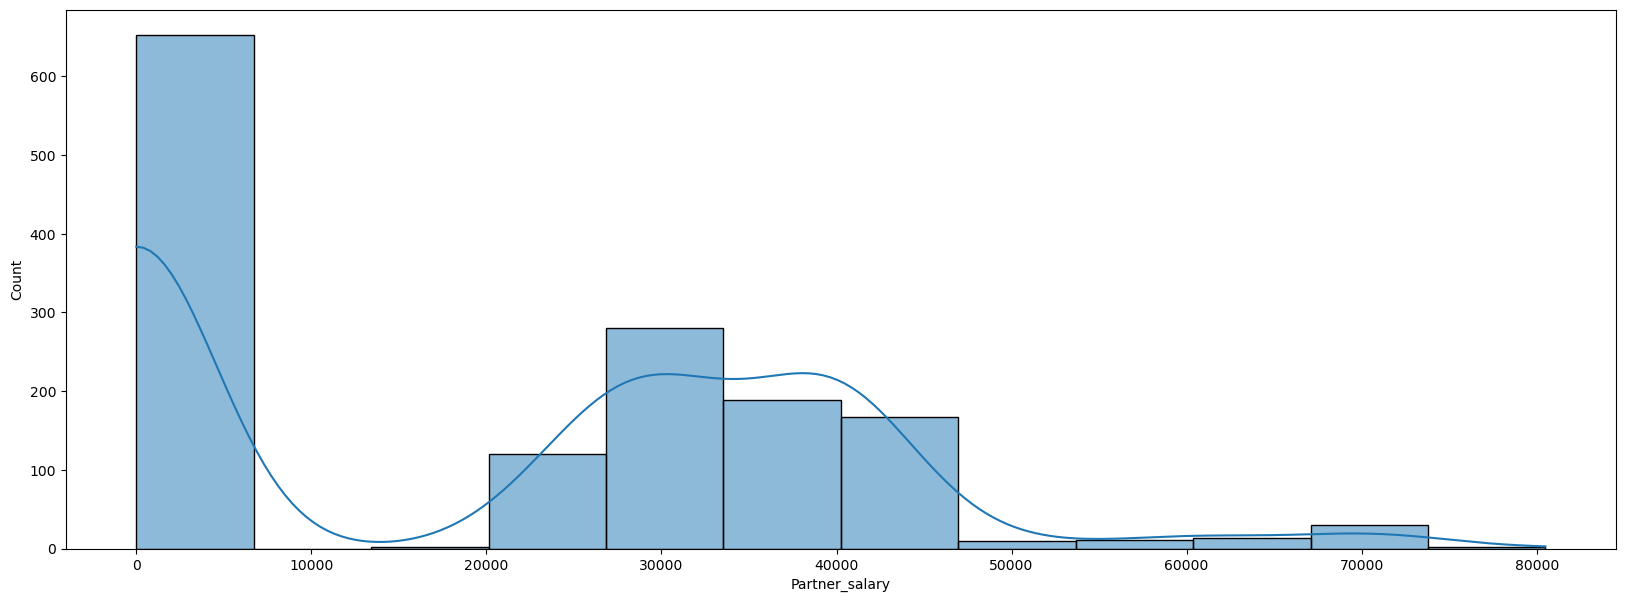

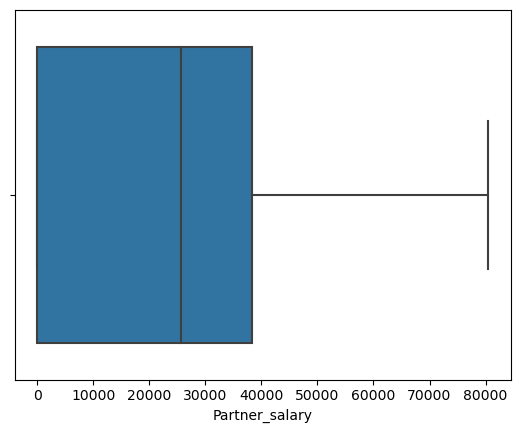

In [141]:
plt.figure(figsize=(20,7))
sns.histplot(data=data, x='Partner_salary', kde=True);
plt.show()
sns.boxplot(data=data, x='Partner_salary');
plt.show()

### Observations:
*Observed Partner_salary distributed is right skewed
*the median is less affected by outliers present in the tail of a right-skewed distribution so Partner_salary is imputed with median value.

In [30]:
median_value = data['Partner_salary'].median()
print('median value:',median_value)
mean_value =data['Partner_salary'].mean()
print('mean value:',mean_value)

median value: 25600.0
mean value: 20225.5593220339


In [31]:
data['Partner_salary'] = data['Partner_salary'].fillna(median_value)

In [32]:
data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

### Observations:
*Treated all the missing values and blank cells in the data set


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


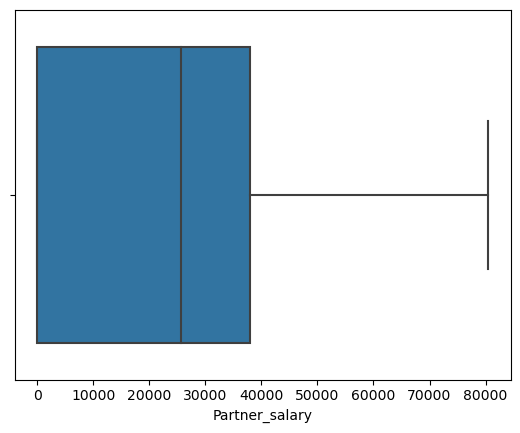

In [33]:
sns.boxplot(data=data, x='Partner_salary');
plt.show()

### Observations:
*After imputing Partner_salary with median value there is no change in the distribution

# Univariate Analysis
- Explore all the variables (categorical and numerical) in the data - Check for and treat (if needed) outliers - Observations and Insights

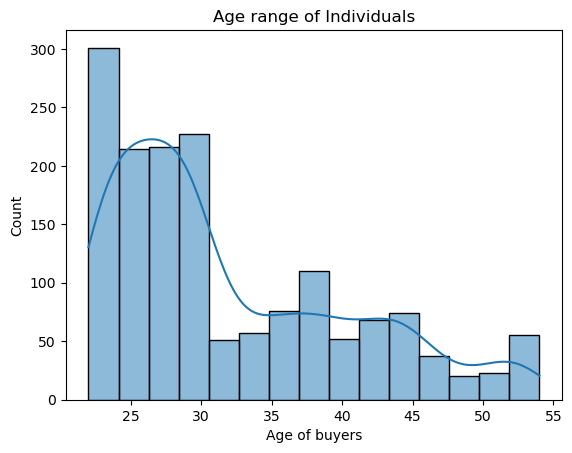

In [34]:
plt.title('Age range of Individuals')
plt.xlabel('Age of buyers')
sns.histplot(data=data, x='Age', kde=True)
plt.show()

### Observations:
*We can conclude for the histplot that most of the individuals are bellow 25 years

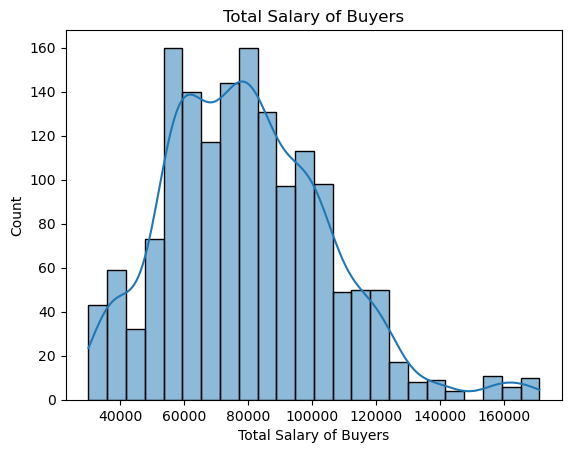

In [36]:
plt.title('Total Salary of Buyers')
plt.xlabel('Total Salary of Buyers')
sns.histplot(data=data, x='Total_salary', kde=True)
plt.show()

### Observations:
*Most of the people have salary in between $50000  to  $85000
*Only few People have salary more than $130000

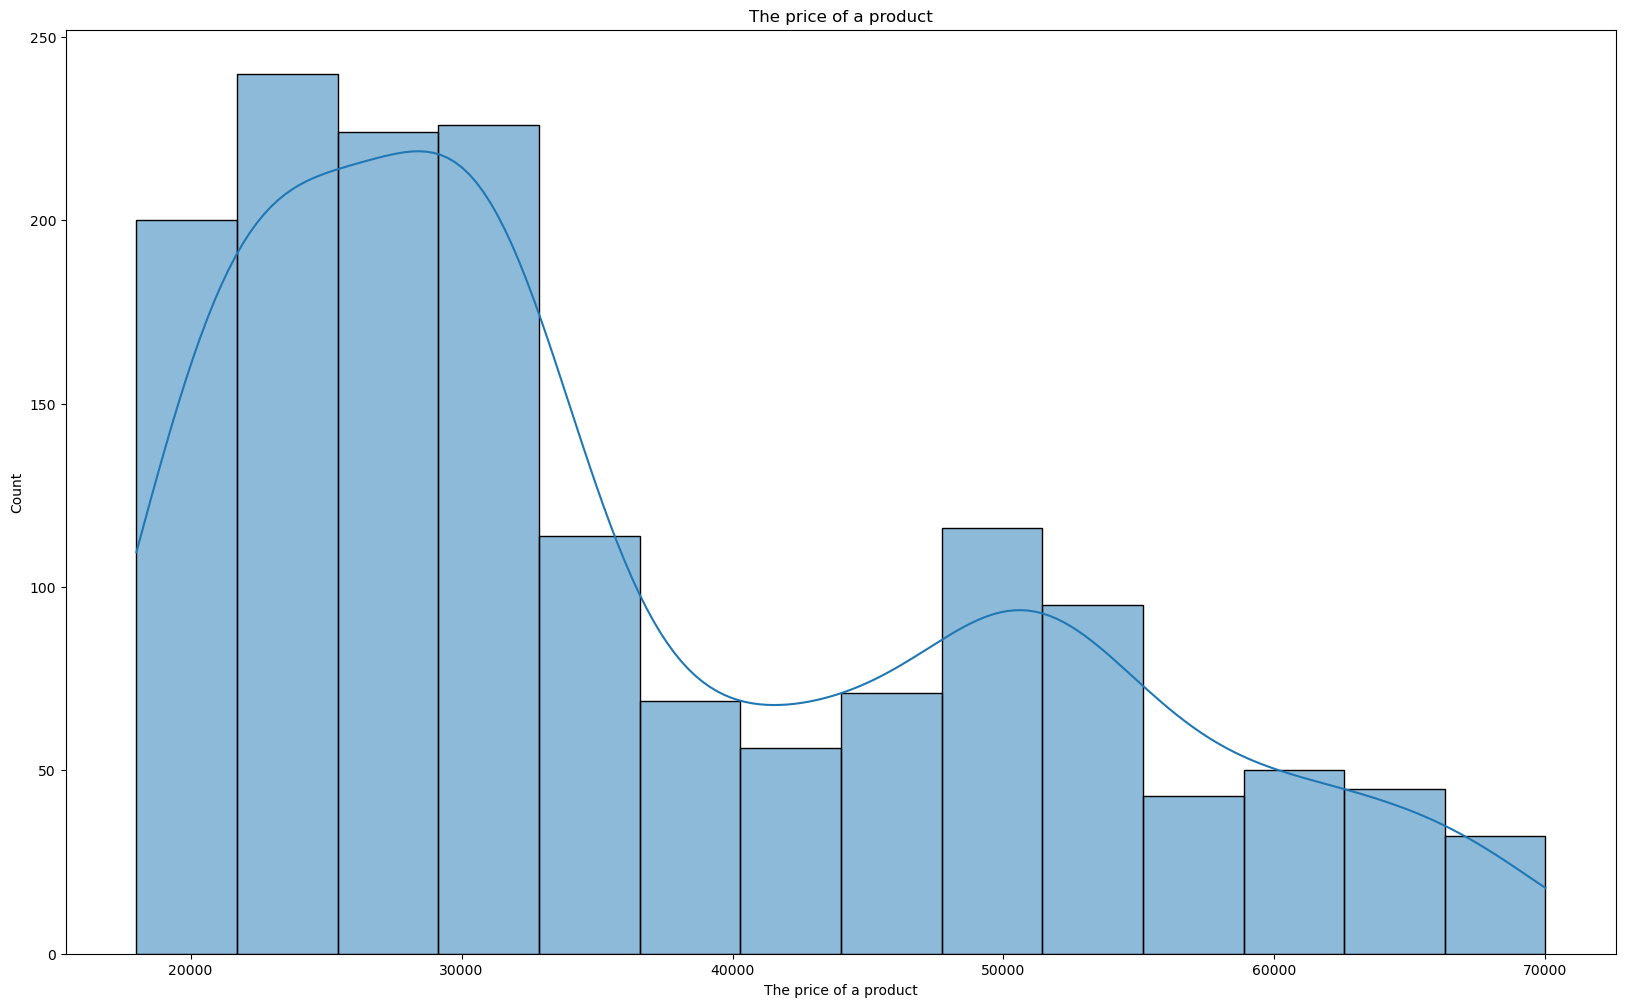

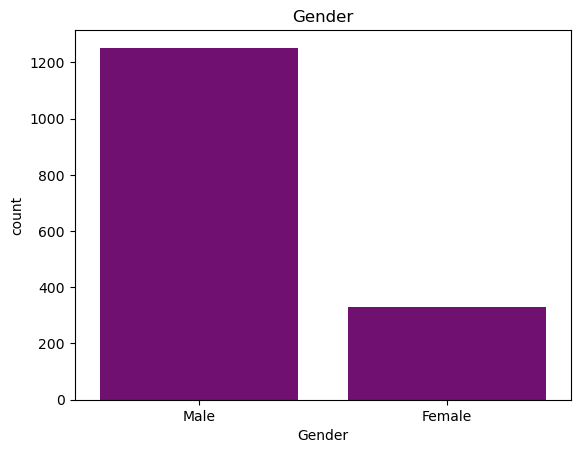

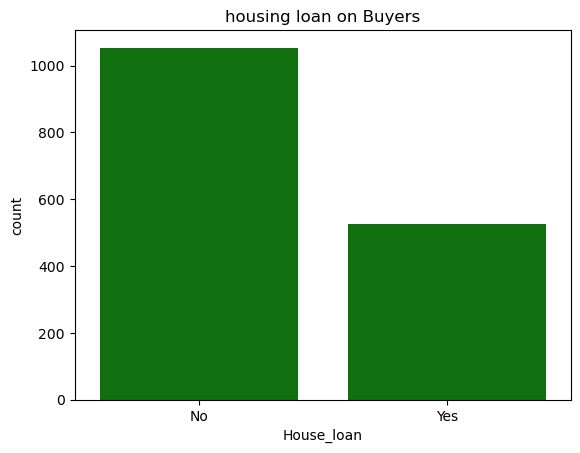

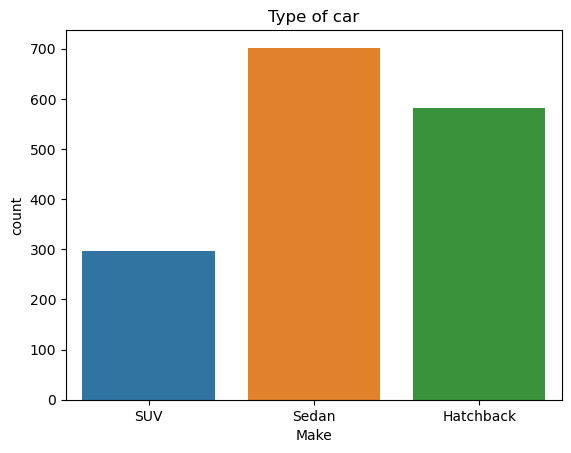

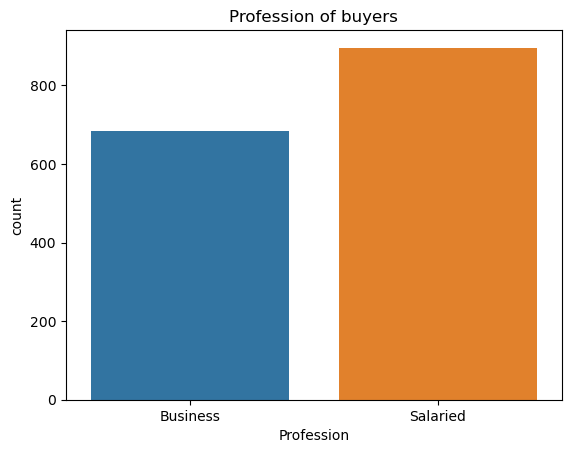

In [89]:
plt.figure(figsize=(20,12))
plt.title('The price of a product')
plt.xlabel('The price of a product')
sns.histplot(data=data, x='Price', kde=True)
plt.show()
plt.title('Gender')
plt.xlabel('Gender')
sns.countplot(data=data, x='Gender',color='Purple')
plt.show()
plt.title('housing loan on Buyers')
plt.xlabel('housing loan on Buyers')
sns.countplot(data=data, x='House_loan',color='green')
plt.show()
plt.title('Type of car')
plt.xlabel('Type of car')
sns.countplot(data=data, x='Make')
plt.show()
plt.title('Profession of buyers')
plt.xlabel('Profession of buyers')
sns.countplot(data=data, x='Profession')
plt.show()


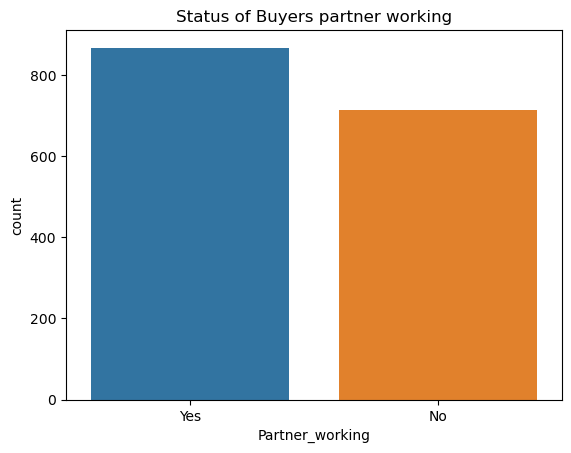

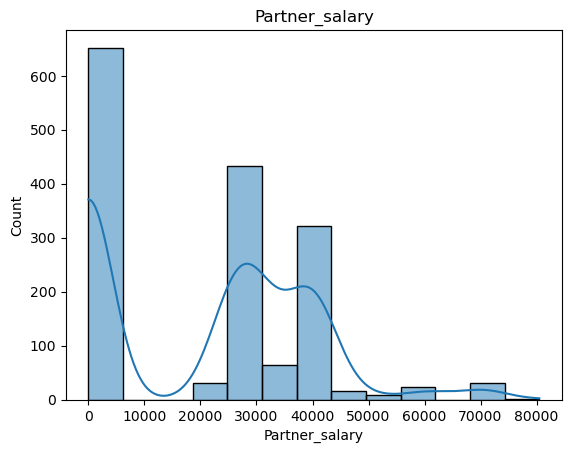

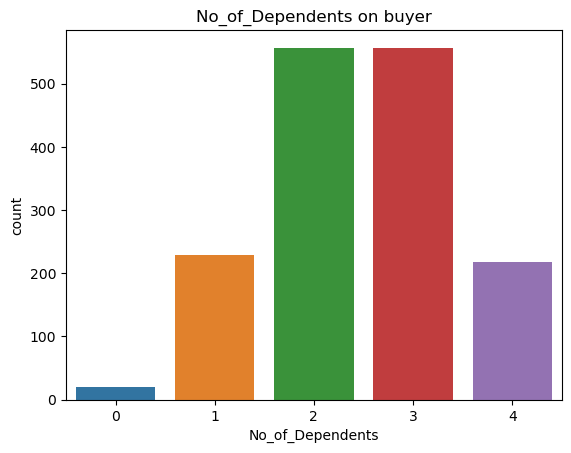

In [40]:
plt.title('Status of Buyers partner working')
plt.xlabel('Working Partner')
plt.ylabel('Count of buyers')
sns.countplot(data=data, x='Partner_working')
plt.show()
plt.title('Partner_salary')
plt.xlabel('Partner_salary')
sns.histplot(data=data, x='Partner_salary', kde=True)
plt.show()
plt.title('No_of_Dependents on buyer')
plt.xlabel('No_of_Dependents')
sns.countplot(data=data, x='No_of_Dependents')
plt.show()

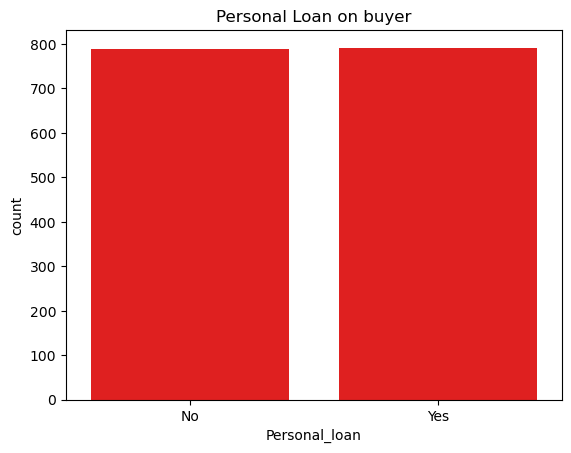

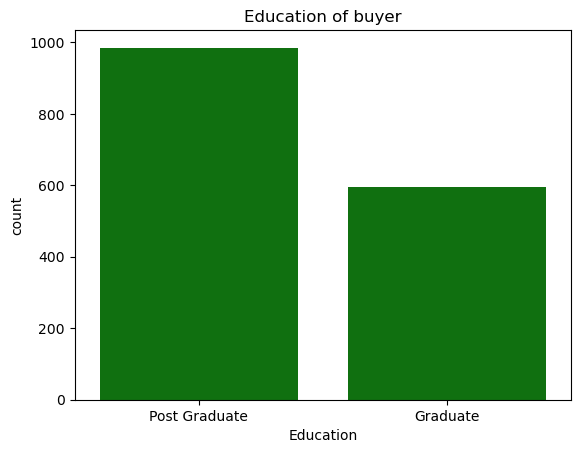

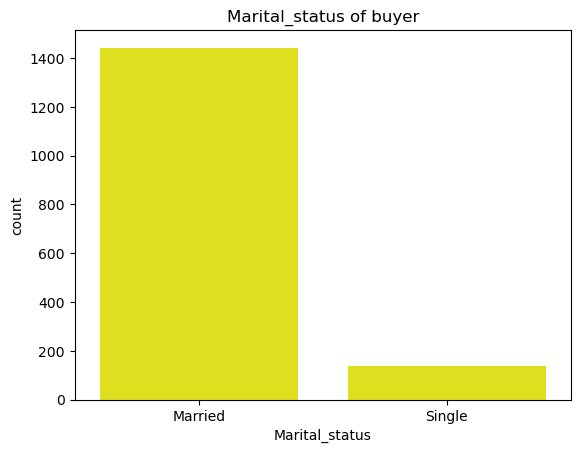

In [42]:
plt.title('Personal Loan on buyer')
plt.xlabel('Personal Loan on buyer')
sns.countplot(data=data, x='Personal_loan', color='Red')
plt.show()
plt.title('Education of buyer')
plt.xlabel('Education of buyer')
sns.countplot(data=data, x='Education', color='R')
plt.show()
plt.title('Marital_status of buyer')
plt.xlabel('Marital_status of buyer')
sns.countplot(data=data, x='Marital_status', color='Yellow')
plt.show()

C:\Users\saddaguduru\AppData\Local\Temp\ipykernel_54200\3460716291.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\saddaguduru\AppData\Local\Temp\ipykernel_54200\3460716291.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\saddaguduru\AppData\Local\Temp\ipykernel_54200\3460716291.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\saddaguduru\AppData\Local\Temp\ipykernel_54200\3460716291.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\saddaguduru\AppData\Local\Temp\ipykernel_54200\3460716291.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


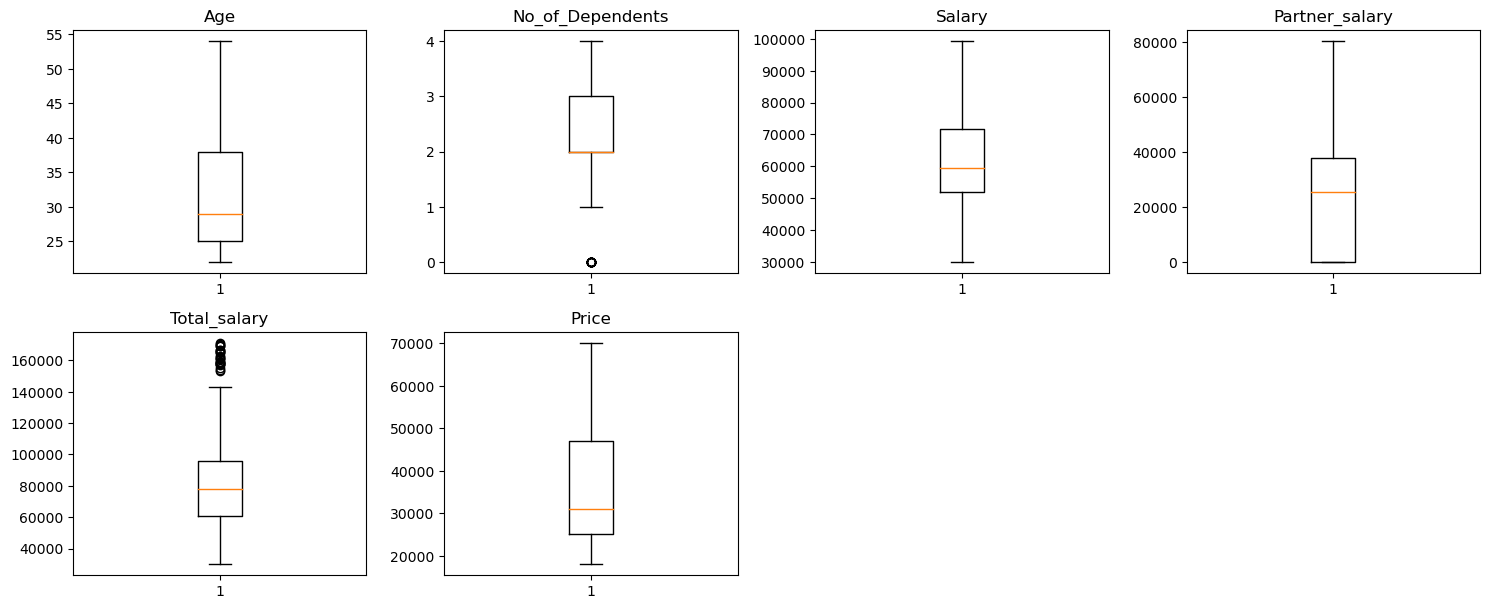

In [43]:
numeric_columns = ['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5);
    plt.tight_layout()
    plt.title(variable)

plt.show();

Found outliers in No_of_Dependents columns and Total_salary

In [44]:
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   

lower_whisker = Q1 - 1.5*IQR    
upper_whisker = Q3 + 1.5*IQR

((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100

Age                 0.000000
No_of_Dependents    1.265022
Salary              0.000000
Partner_salary      0.000000
Total_salary        1.707780
Price               0.000000
dtype: float64

In [96]:
def treat_outliers(df, col):

    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

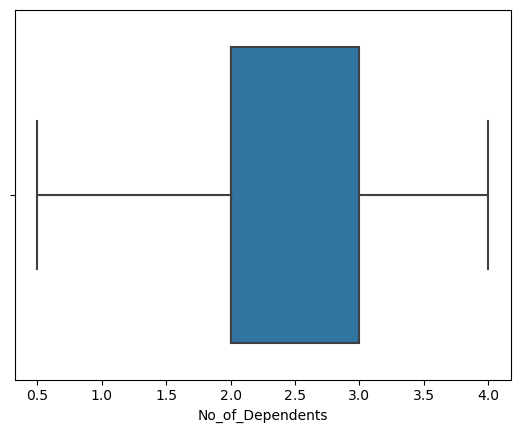

In [97]:
data = treat_outliers(data,'No_of_Dependents')

sns.boxplot(data=data,x='No_of_Dependents')
plt.show()

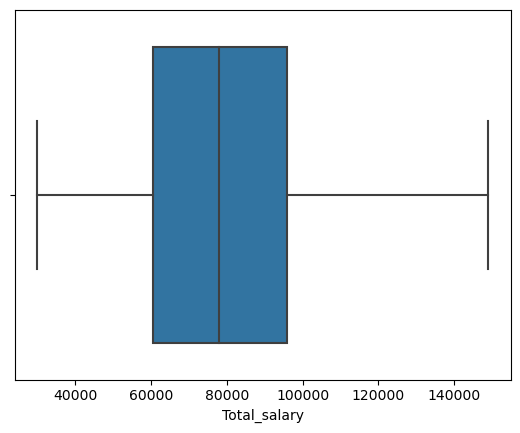

In [93]:
data = treat_outliers(data,'Total_salary')

sns.boxplot(data=data,x='Total_salary')
plt.show()

In [94]:
data['No_of_Dependents'] = data['No_of_Dependents'].astype(int)
data['Total_salary'] = data['Total_salary'].astype(int)

C:\Users\saddaguduru\AppData\Local\Temp\ipykernel_54200\1502786906.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\saddaguduru\AppData\Local\Temp\ipykernel_54200\1502786906.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\saddaguduru\AppData\Local\Temp\ipykernel_54200\1502786906.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\saddaguduru\AppData\Local\Temp\ipykernel_54200\1502786906.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\saddaguduru\AppData\Local\Temp\ipykernel_54200\1502786906.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


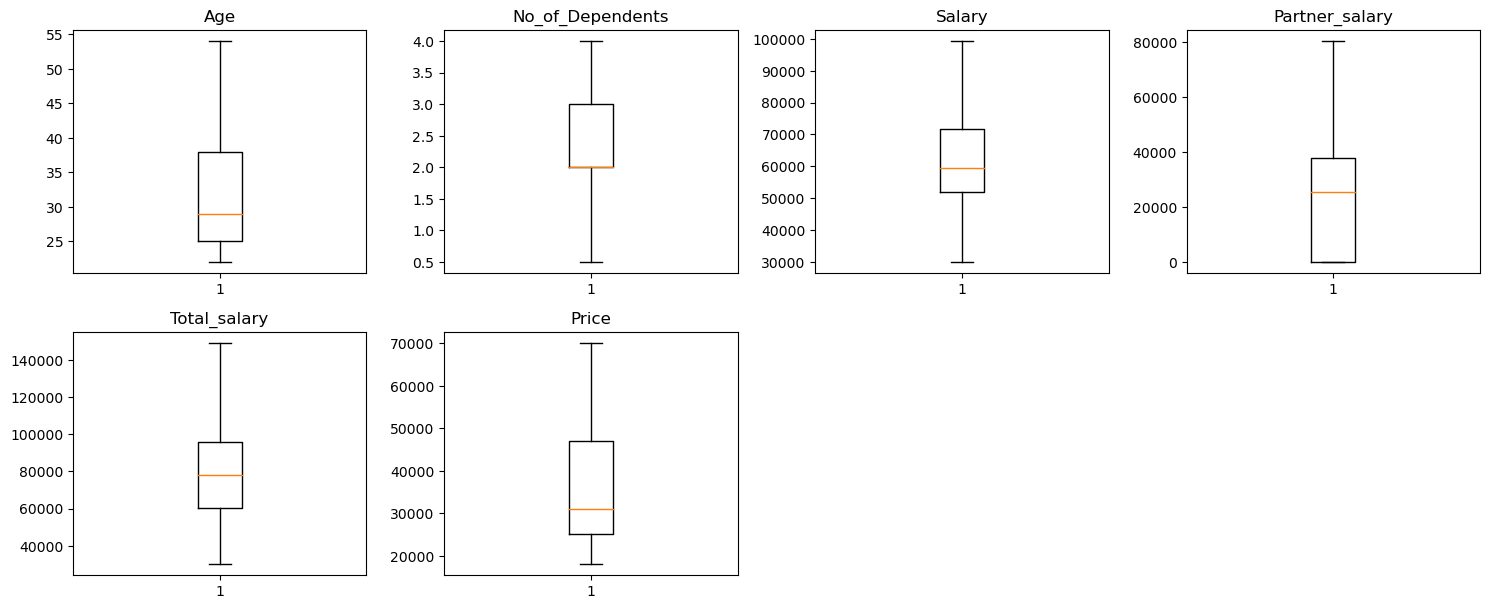

In [98]:
# After treating outliers
numeric_columns = ['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5);
    plt.tight_layout()
    plt.title(variable)

plt.show();

In [166]:
cat_cols =  ['Gender', 'Profession', 'Marital_status', 'Education','Personal_loan','House_loan','Partner_working','Make']
plt.figure(figsize=(15, 12))

for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)
    

Gender
Male      1252
Female     329
Name: count, dtype: int64
--------------------------------------------------
Profession
Salaried    896
Business    685
Name: count, dtype: int64
--------------------------------------------------
Marital_status
Married    1443
Single      138
Name: count, dtype: int64
--------------------------------------------------
Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64
--------------------------------------------------
Personal_loan
Yes    792
No     789
Name: count, dtype: int64
--------------------------------------------------
House_loan
No     1054
Yes     527
Name: count, dtype: int64
--------------------------------------------------
Partner_working
Yes    868
No     713
Name: count, dtype: int64
--------------------------------------------------
Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64
--------------------------------------------------


<Figure size 1500x1200 with 0 Axes>

# Bivariate Analysis
- Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables

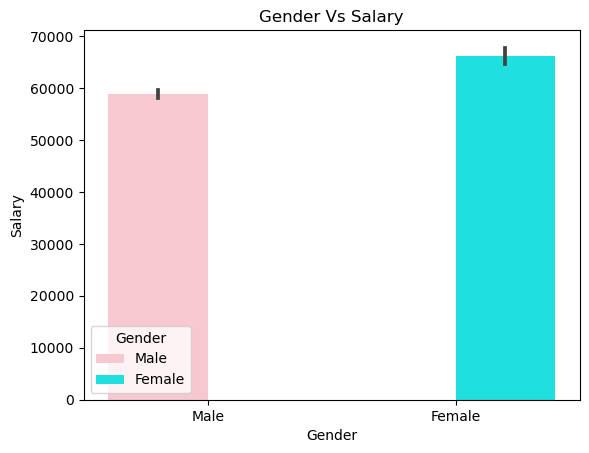

In [55]:
plt.title('Gender Vs Salary')
plt.xlabel('Gender of buyer')
plt.ylabel('salary of buyer')
sns.barplot(data=data, y='Salary',x='Gender', palette=['Pink','Cyan'],hue='Gender');
plt.show()

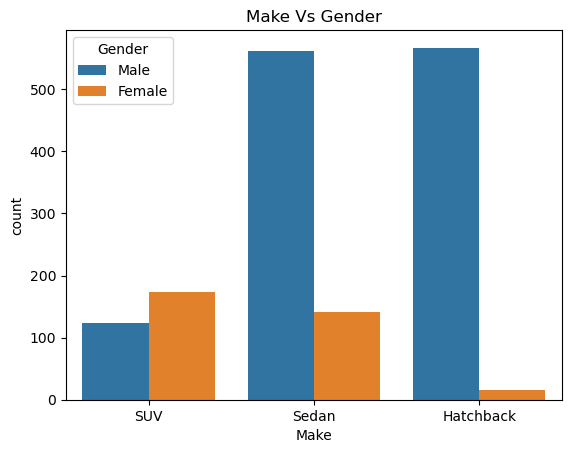

In [57]:
plt.title('Make Vs Gender')
plt.xlabel('Make of the car')
sns.countplot(data=data,x='Make',hue='Gender');
plt.show()

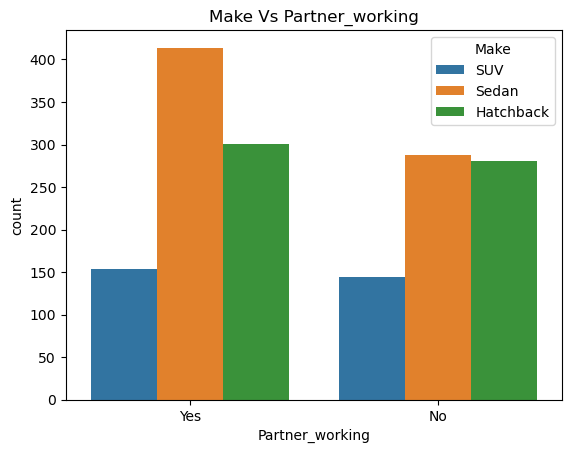

In [58]:
plt.title('Make Vs Partner_working')
plt.xlabel('Make of the car')
plt.xlabel('Partner_working')
sns.countplot(data=data,x='Partner_working',hue='Make');
plt.show()

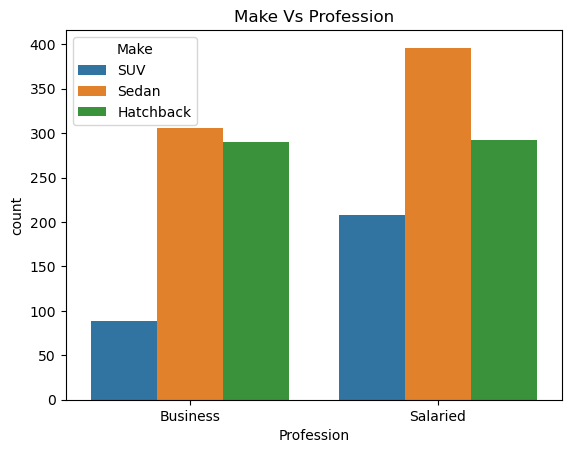

In [59]:
plt.title('Make Vs Profession')
plt.xlabel('Make of the car')
plt.xlabel('Profession')
sns.countplot(data=data,x='Profession',hue='Make');
plt.show()

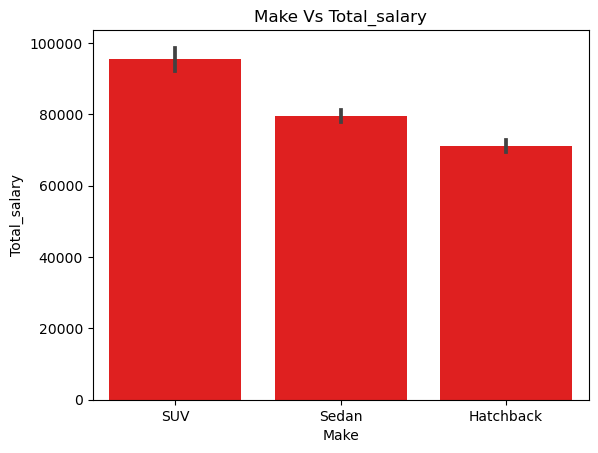

In [60]:
plt.title('Make Vs Total_salary')
plt.xlabel('Make of the car')
plt.xlabel('Total_salary')
sns.barplot(data=data,y='Total_salary',x='Make',color='red');
plt.show()

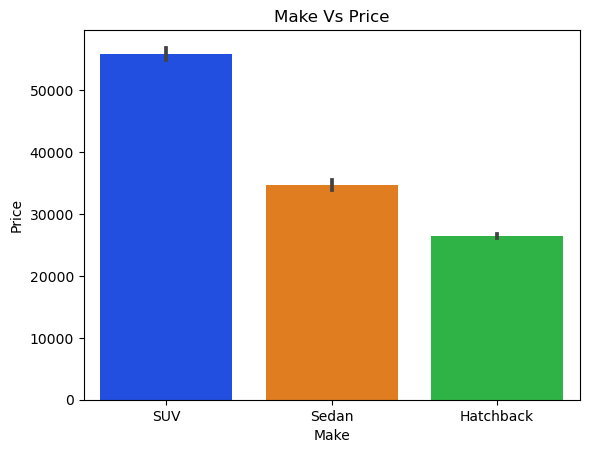

In [64]:
plt.title('Make Vs Price')
plt.xlabel('Make of the car')
plt.xlabel('Price')
sns.barplot(data=data, y='Price',x='Make',palette ='bright');
plt.show()

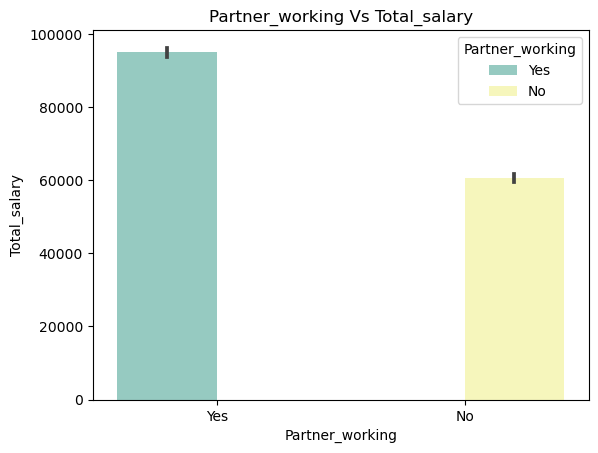

In [65]:
plt.title('Partner_working Vs Total_salary')
plt.xlabel('Partner_working status')
plt.ylabel('Total_salary')
sns.barplot(data=data, y='Total_salary',x='Partner_working',palette ='Set3', hue='Partner_working');
plt.show()

C:\Users\saddaguduru\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\saddaguduru\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


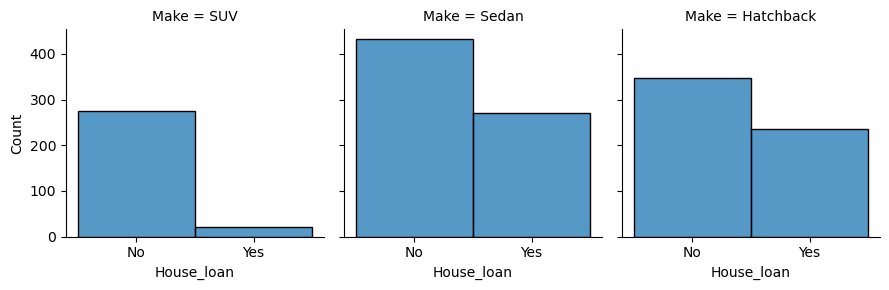

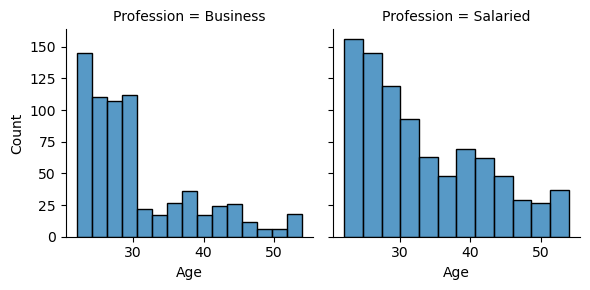

In [67]:
m=sns.FacetGrid(data, col='Make')
m.map(sns.histplot,'House_loan');
n=sns.FacetGrid(data, col='Profession');
n.map(sns.histplot,'Age');

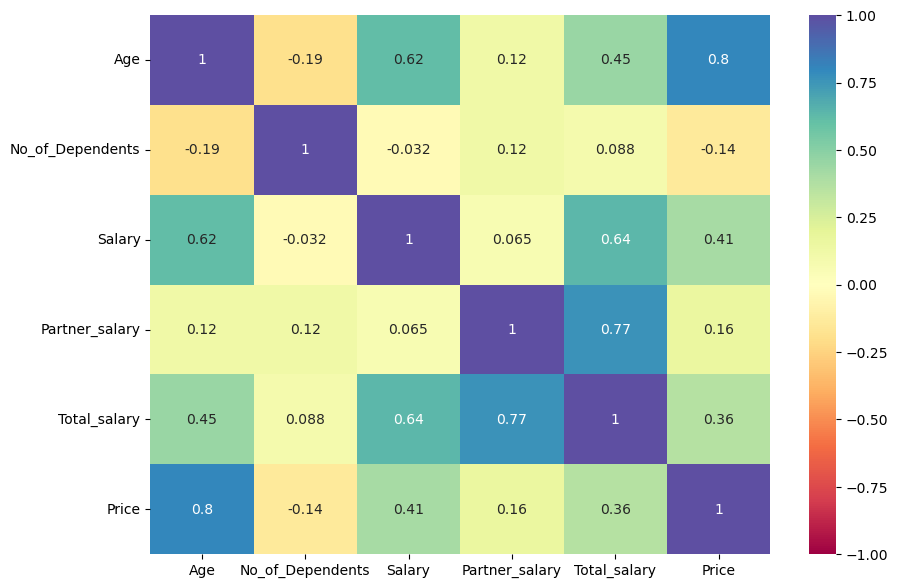

In [68]:
plt.figure(figsize=(10,7))
sns.heatmap(data[numeric_columns].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

C:\Users\saddaguduru\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


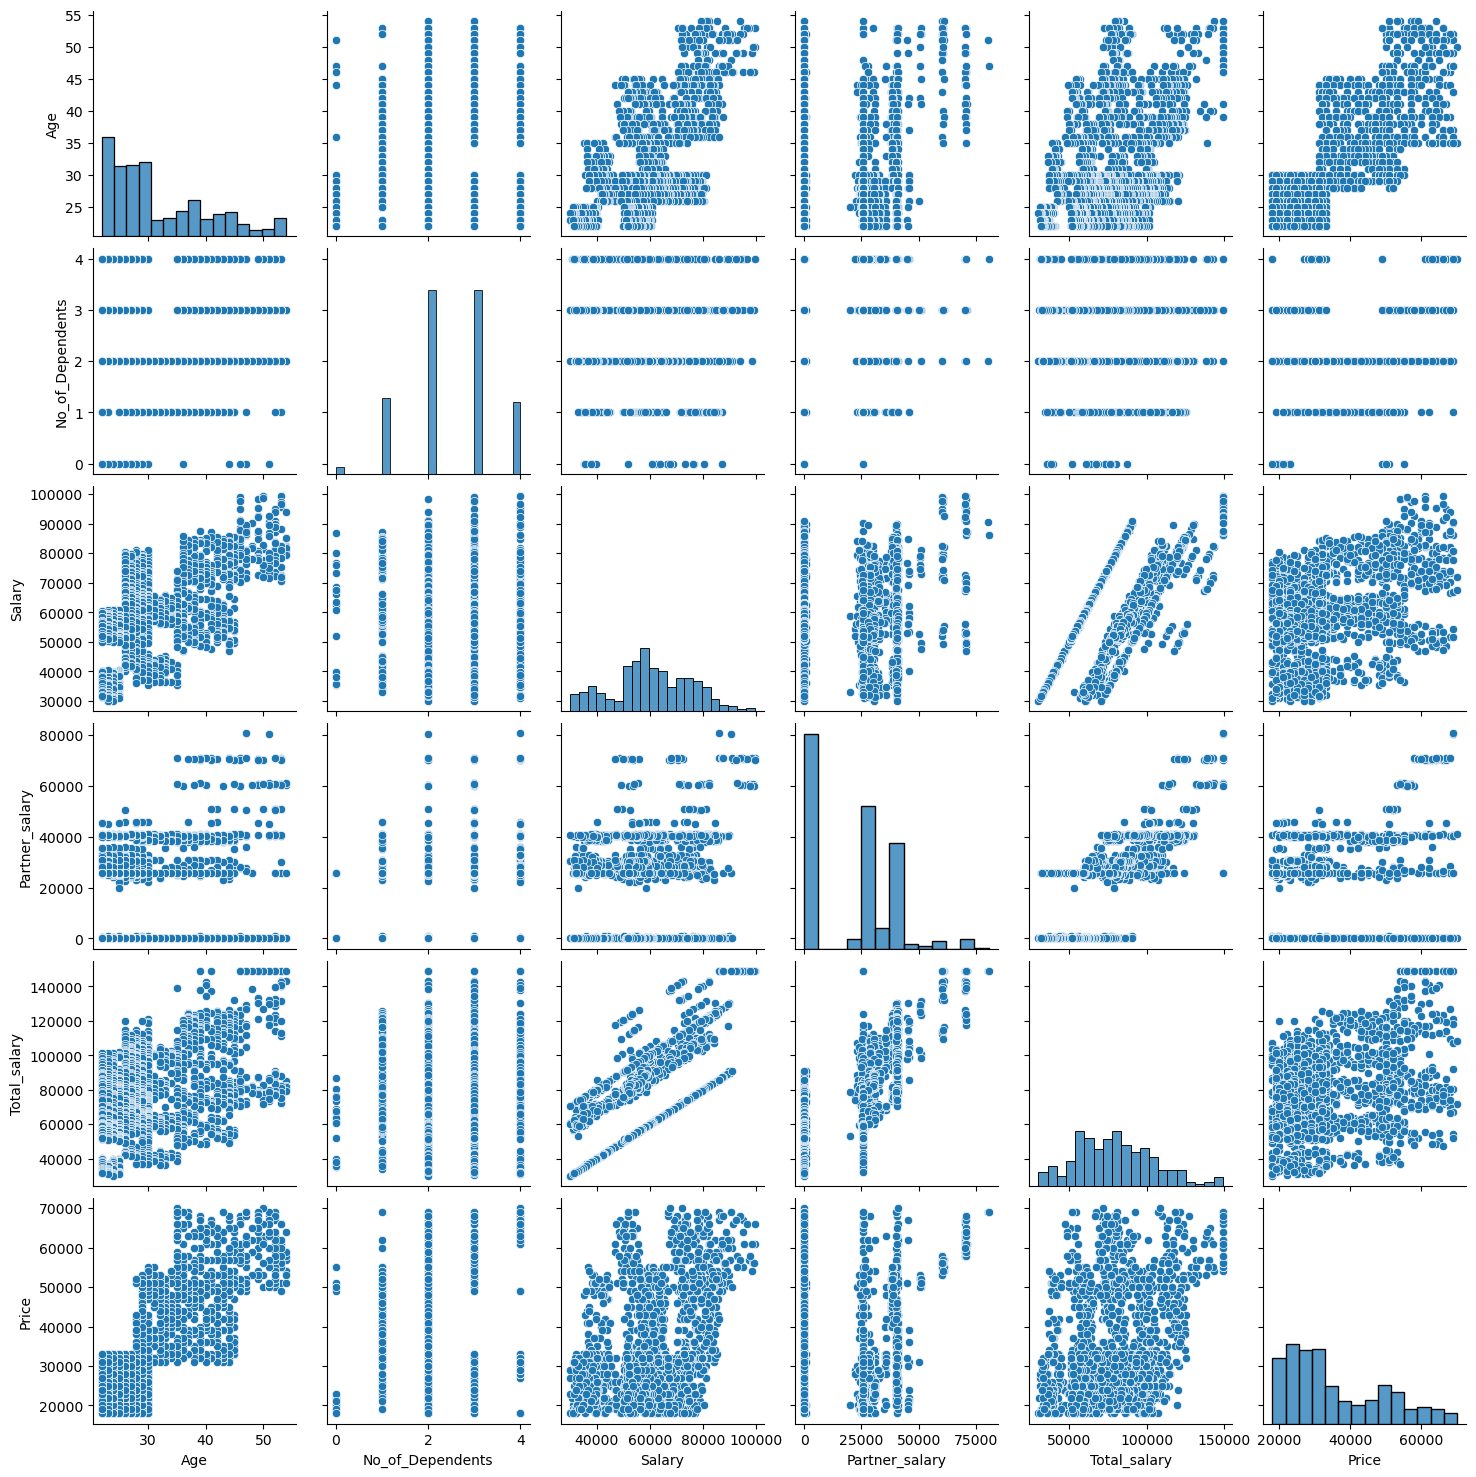

In [69]:
sns.pairplot(data=data);

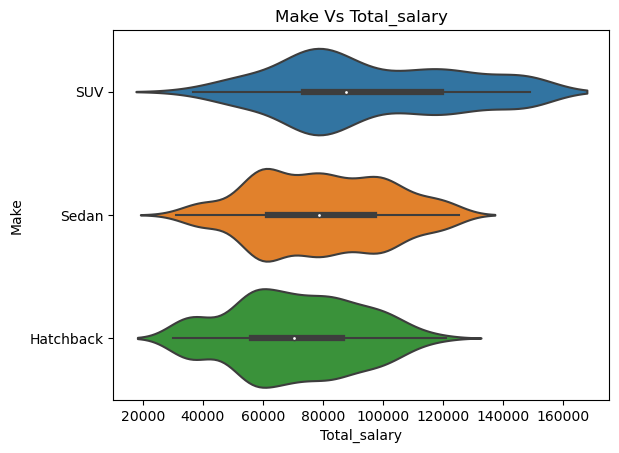

In [72]:
plt.title('Make Vs Total_salary')
plt.xlabel('Total_salary')
plt.ylabel('Make')
sns.violinplot(data=data,x='Total_salary', y='Make');
plt.show()

<Axes: title={'center': 'Salary Vs Profession'}, xlabel='Salary', ylabel='Profession'>

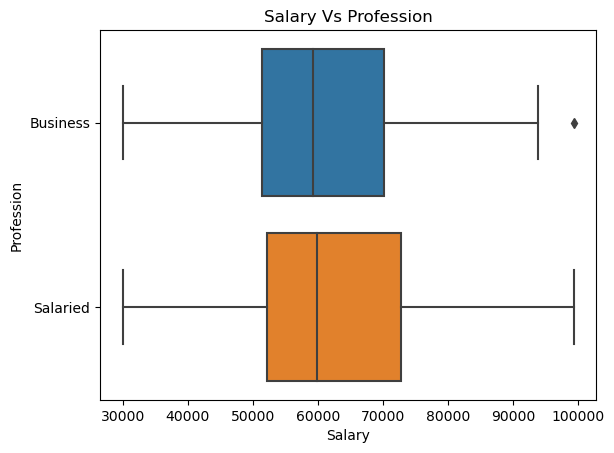

In [71]:
plt.title('Salary Vs Profession')
plt.xlabel('Salary')
plt.ylabel('Profession')
sns.boxplot(data=data, x='Salary', y='Profession')

C:\Users\saddaguduru\AppData\Local\Temp\ipykernel_54200\1112596945.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data,x='Age', y='Price', ci=False);


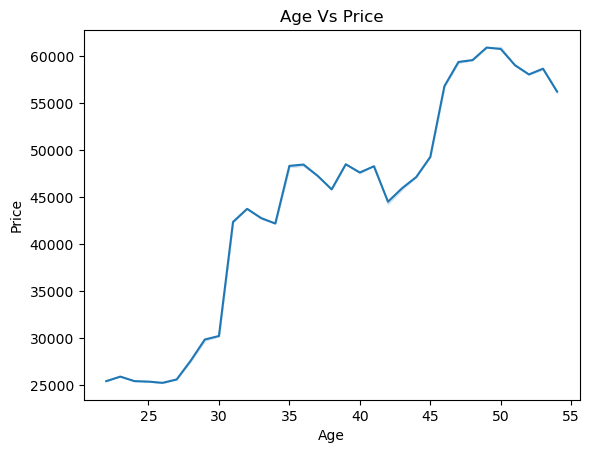

In [75]:
plt.title('Age Vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
sns.lineplot(data=data,x='Age', y='Price', ci=False);
plt.show()

# Key Questions
Explore the data to answer the following key questions:

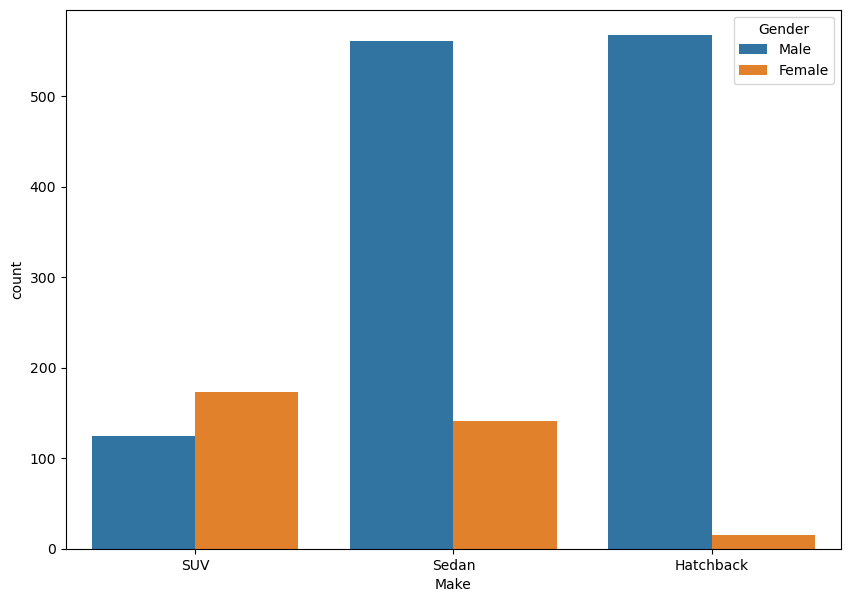

In [77]:
# 1)Do men tend to prefer SUVs more compared to women? 
#Ans) No, Women tend to prefer SUVs more compared to men.

plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Make',hue ='Gender');
plt.show()

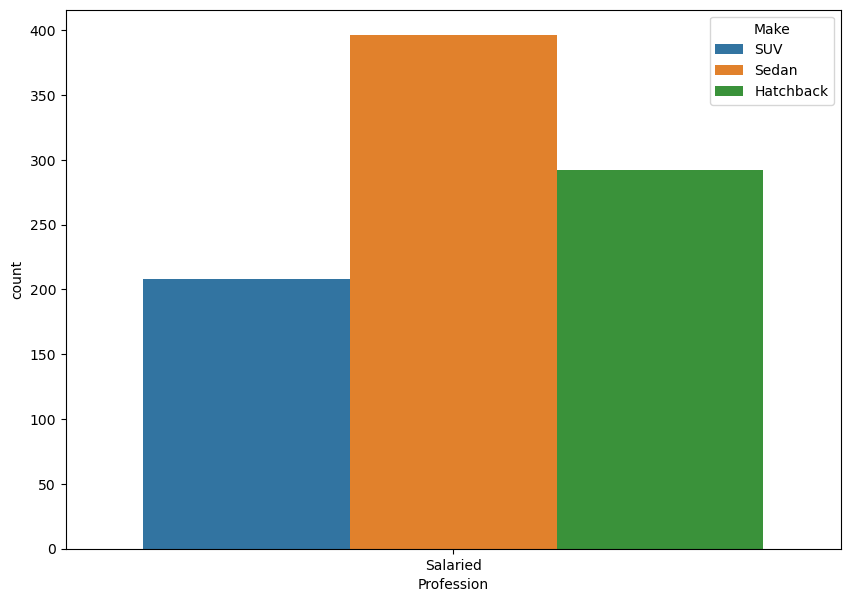

In [86]:
#2) What is the likelihood of a salaried person buying a Sedan
#Ans)A salaried person is more likely to by a Sedan and compared to SUV and Hatchback
plt.figure(figsize=(10,7))
sns.countplot(data=data[(data['Profession']=='Salaried')], x='Profession', hue='Make');
plt.show()

C:\Users\saddaguduru\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\saddaguduru\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

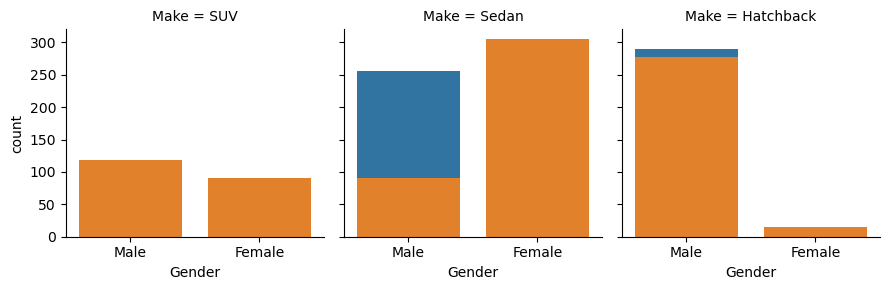

In [79]:
#3)What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?
#Ans)From the Graphs bellow evidence doesn't holds the Sheldon Cooper's claim
plt.figure(figsize=(10,7))
g = sns.FacetGrid(data, col="Make", hue='Profession')
g.map(sns.countplot, "Gender");
plt.show()

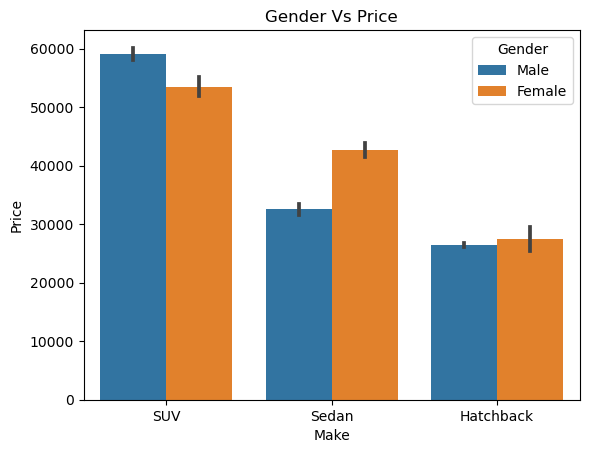

In [87]:
#4)How does the the amount spent on purchasing automobiles vary by gender
#Ans)Female spend more than Male

plt.title('Gender Vs Price')
plt.xlabel('Gender')
plt.ylabel('Price')
sns.barplot(data=data, x='Make',y='Price', hue='Gender');
plt.show()

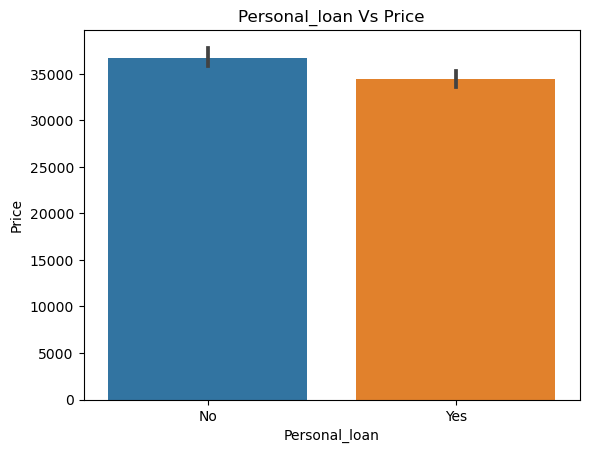

In [83]:
#5)How much money was spent on purchasing automobiles by individuals who took a personal loan?
#Ans)The approximate amount spend on purchasing automobile by individual who tooks personal loan is $34k

plt.title('Personal_loan Vs Price')
plt.xlabel('Personal_loan')
plt.ylabel('Price')
sns.barplot(data=data, x='Personal_loan',y='Price');
plt.show()

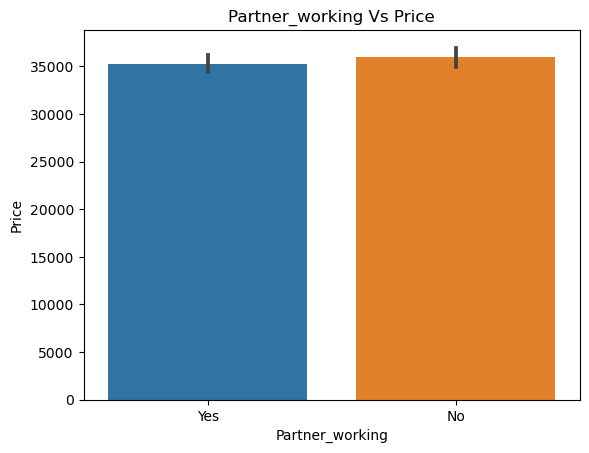

In [82]:
#6)How does having a working partner influence the purchase of higher-priced cars?
#Ans) Having a working partner doesn't influence the purchase of higher-priced cars
plt.title('Partner_working Vs Price')
plt.xlabel('Partner_working')
plt.ylabel('Price')
sns.barplot(data=data, x='Partner_working',y='Price');
plt.show()